# Collecting Code-switching Conversations from Chinese Wikipedia

In [1]:
# import bz2
import json
import jsonlines
import mwparserfromhell
import mwxml
import re
# import wikichatter as wc

In [2]:
ZHWIKI = "/shared/0/projects/code-switching/zhwiki/zhwiki-20240401-pages-meta-history/"

# Load a Dump
The dump files are gigantic; to avoid overloading the server it probably makes sense to delete the decompressed file afterward

In [3]:
# !bzip2 -dk {ZHWIKI}zhwiki-20240401-pages-meta-history1.xml-p1p2289.bz2

Try using method from Abraham's repo:

In [4]:
# https://github.com/abrahami/sustainable-high-quality-wikis/blob/main/modeling/modeling_utils.py#L768
def load_and_decompress(filename):
    with bz2.open(filename, 'rt') as f:
        reader = jsonlines.Reader(f)
        return list(reader)

In [5]:
# load_and_decompress("{}zhwiki-20240401-pages-meta-history1.xml-p1p2289.bz2".format(ZHWIKI))

Try using another way:

In [6]:
dump = mwxml.Dump.from_file(open("{}zhwiki-20240401-pages-meta-history1.xml-p1p2289".format(ZHWIKI)))

The "namespace" variable gives us the type of page: https://en.wikipedia.org/wiki/Wikipedia:Namespace#Programming

We are interested in namespaces:
 - {{ns:3}}: User talk page
 - {{ns:1}}: talk
 
Revision IDs and parent ids can help us trace threads

We can visit the first page returned here: https://zh.wikipedia.org/wiki/User_talk:Formulax/Archive1

This loop demonstrates how to get the most recent version of the page:

In [39]:
pages = []

for page in dump:
    if page.namespace in {1,3}:
        print(page)
        
        revision = None
        for revision in page:
            pass
        
        pages.append(revision)
        
    if len(pages) == 3:
        break
    else:
        continue

Page(id=234, title='Mountain/存档 1', namespace=3, redirect=None, restrictions=[])
Page(id=238, title='Number5', namespace=3, redirect=None, restrictions=[])
Page(id=279, title='密码学', namespace=1, redirect=None, restrictions=[])


# Experiment with mwchatter

First page: https://zh.wikipedia.org/wiki/User_talk:Number5

In [40]:
parsed_text1 = wc.parse(pages[0].text)

In [42]:
parsed_text1

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['{{来自已转换的wiki文本讨论页的存档|from=User talk:Mountain|date=2021-05-22}}\n',
      '{{从Wiki文本讨论页转换为Flow页面|archive=User talk:Mountain/Flow 存档 1|date=2016-05-16}}\n',
      '\n',
      '<div style="width: 100%; margin: 0.2em 0; padding: 0.3em 0; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; font-size: 120%;">\'\'\'您好，Mountain！[[wikipedia:欢迎，新来者|欢迎]]加入维基百科！\'\'\'</div>\n',
      "感謝您對維基百科的興趣與貢獻，希望您會喜歡這裡。除了'''[[wikipedia:欢迎，新来者|歡迎辭]]'''外，也請您了解以下重要文章：\n",
      '{| style="background: transparent; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; border-collpase: collapse;"\n\n|- style="vertical-align: top;"\n| style="background: #f4f4f4; padding: .8em .2em;" |\n[[Image:Nuvola apps korganizer.png|35px|left|政策]]<div style="margin-left: 45px;">\n\'\'\'[[wikipedia:五大支柱|五大支柱]]\'\'\'<br /><small>[[wikipedia:不适合维基百科的文章|百科]]、[[wikipedia:中性的观点|中立]]、[[wikipedia:简明版权信息|开放]]、[[wikipedia:文明|互重]]、[[wikipedia:忽略所有规则|勇於改善]]</sm

In [44]:
len(parsed_text1["sections"])

90

In [43]:
parsed_text1["sections"][0]["comments"]

[{'text_blocks': ['{{来自已转换的wiki文本讨论页的存档|from=User talk:Mountain|date=2021-05-22}}\n',
   '{{从Wiki文本讨论页转换为Flow页面|archive=User talk:Mountain/Flow 存档 1|date=2016-05-16}}\n',
   '\n',
   '<div style="width: 100%; margin: 0.2em 0; padding: 0.3em 0; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; font-size: 120%;">\'\'\'您好，Mountain！[[wikipedia:欢迎，新来者|欢迎]]加入维基百科！\'\'\'</div>\n',
   "感謝您對維基百科的興趣與貢獻，希望您會喜歡這裡。除了'''[[wikipedia:欢迎，新来者|歡迎辭]]'''外，也請您了解以下重要文章：\n",
   '{| style="background: transparent; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; border-collpase: collapse;"\n\n|- style="vertical-align: top;"\n| style="background: #f4f4f4; padding: .8em .2em;" |\n[[Image:Nuvola apps korganizer.png|35px|left|政策]]<div style="margin-left: 45px;">\n\'\'\'[[wikipedia:五大支柱|五大支柱]]\'\'\'<br /><small>[[wikipedia:不适合维基百科的文章|百科]]、[[wikipedia:中性的观点|中立]]、[[wikipedia:简明版权信息|开放]]、[[wikipedia:文明|互重]]、[[wikipedia:忽略所有规则|勇於改善]]</small>\n</div>\n\n| style="background: #faf1df; padding: .8em .2em

In [45]:
parsed_text1["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['== 申請罷免管理員[[User:Shizhao]]投票==\n',
    '\n',
    '我注意到你在[[Wikipedia:申請罷免管理員/Shizhao/第4次]]投票時未加上理由。[[WP:RFDA|申請罷免管理員方針]]（解任過程：→投票）有「無論支持票還是反對票，投票人需給出理由」的規定。如果日後嚴格地復核投票結果，你的一票就有被註為無效的可能。請你考慮前去補上一個簡短的理由吧。—[[User:Computor|Computor]] ([[User talk:Computor|留言]]) 2010年4月12日 (一) 13:57 (UTC)\n',
    '\n'],
   'comments': [],
   'cosigners': []}],
 'heading': ' 申請罷免管理員[[User:Shizhao]]投票'}

In [46]:
parsed_text1["sections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['== 有兴趣加入条目拯救队吗？==\n',
    '\n',
    '如题—[[User:Edouardlicn|Edouardlicn]] ([[User talk:Edouardlicn|留言]]) 2010年4月27日 (二) 05:36 (UTC)\n',
    '\n',
    ':非常抱歉，因为平日工作比较忙，只能参加有限的几个维基上的活动，还请谅解。--[[User:Mountain|Mountain]] ([[User talk:Mountain#top|留言]]) 2010年4月27日 (二) 09:45 (UTC)\n'],
   'comments': [],
   'cosigners': []}],
 'heading': ' 有兴趣加入条目拯救队吗？'}

In [47]:
parsed_text1["sections"][3]

{'subsections': [],
 'comments': [{'text_blocks': ['== 打個招呼==\n',
    '\n',
    '你好啊\n',
    '\n',
    '這一陣子才開始真正摸索怎麼編輯,先來打個招呼.(之前試過一兩次,但總是半途而廢...)\n',
    '\n',
    '(預覽時發現"發言須與本百科之寫作或改進有關",我這麼算是違規了嗎?)\n',
    '\n',
    '在維基上最擔心的就是不小心犯規了...\n',
    '\n',
    '[[User:Feima|Feima]] ([[User talk:Feima|留言]]) 2010年5月14日 (五) 02:18 (UTC)\n',
    '\n'],
   'comments': [],
   'cosigners': []}],
 'heading': ' 打個招呼'}

In [48]:
parsed_text1["sections"][4]

{'subsections': [],
 'comments': [{'text_blocks': ['== 邀请参加第八次动员令==\n',
    '<div style="border: 5px solid #C71585; background: #AFEEEE; padding: 1em; -moz-border-radius: 15px; -webkit-border-radius: 15px;">\n\n<font style="font-size: 170%; "></font><center><font color="#DE3163">[[File:Wikipedia-logo-v2-zh.svg|30px|中文维基百科]]  \'\'\'第八次动员令邀请函\'\'\'</font></center>\n\n[[文件:Wikipedesketch1.png|100px|left|查查资料，完善条目！]][[File:八.png|100px|right|第八次动员令|link=File:%E5%85%AB.png]]亲爱的维基百科用户您好：\n\n为了增加中文维基的条目数量，[[wikipedia:动员令/第八次动员令|第八次动员令]]将在2010年7月1日开始，8月28日结束，期间欢迎阁下积极参与。\n\n本次动员令分為大、中及小動員令，中動員令的4个主题分别是\'\'\'世界各地\'\'\'、\'\'\'自然与自然科学\'\'\'、\'\'\'最多语言待撰写条目\'\'\'和\'\'\'基础条目\'\'\'，小動員令的2个主题分别是\'\'\'战争及军事武器\'\'\'以及\'\'\'侵权待拯救条目\'\'\'。\n\n关于本次动员令的详细规定请阁下参见：[[Wikipedia:动员令/第八次动员令]]\n\n请收到此邀请函的维基人，利用{{tls|动员令/8}}，将此动员令贴到其他还未收到此动员令的维基人讨论页上，就算您由于各种原因不能响应本次动员令、积极建立新条目，也请帮忙散发动员令，因为能否将动员令[[wikipedia:动员令/散发动员令|传播]]出去，是历次动员令成败关键之一。大家一起合力才能提高维基的质量！\n\n<span style="display:none"></span>邀请人：[[User:Evo101469|Evo101

In [49]:
parsed_text1["sections"][7]

{'subsections': [],
 'comments': [{'text_blocks': ['== 編輯星章==\n',
    '\n',
    '{| style="border: 1px solid gray; background-color: #fdffe7;"\n\n| rowspan="2" valign="middle" |[[File:Editors Barnstar Hires.png|100px]]\n\n| rowspan="2" |\n| style="font-size: x-large; padding: 0; vertical-align: middle; height: 1.1em;" |\'\'\'編輯星章\'\'\'\n\n|-\n| style="vertical-align: middle; border-top: 1px solid gray;" |作為維基人的先驅，此星章一定要頒給你。 [[User:Flamelai|Flame]] [[User talk:Flamelai|歡迎泡茶]] 2010年7月21日 (三) 02:10 (UTC)\n\n|}\n'],
   'comments': [],
   'cosigners': []}],
 'heading': ' 編輯星章'}

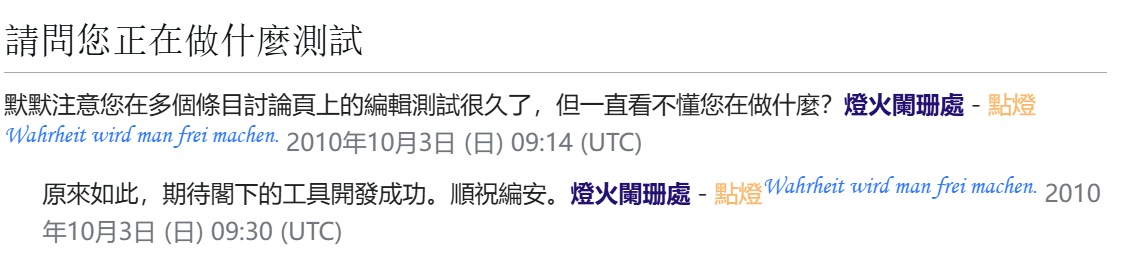

See how the package parses nested comments as above:
- header is its own text block
- each user comment is its own text block
- why is everything under the same comment though?

In [50]:
parsed_text1["sections"][8]

{'subsections': [],
 'comments': [{'text_blocks': ['== 請問您正在做什麼測試==\n',
    '默默注意您在多個條目討論頁上的編輯測試很久了，但一直看不懂您在做什麼？[[User:燈火闌珊處|<span style="color: #191970;">\'\'\'燈火闌珊處\'\'\'</span>]]－[[User talk:燈火闌珊處|<span style="color: #FFB366;">點燈</span>]][[Special:用户贡献/燈火闌珊處|<sup><span style="font-family:Monotype Corsiva;font-size:medium;color:#007FFF">Wahrheit wird man frei machen.</span></sup>]] 2010年10月3日 (日) 09:14 (UTC)\n',
    ':原來如此，期待閣下的工具開發成功。順祝編安。[[User:燈火闌珊處|<span style="color: #191970;">\'\'\'燈火闌珊處\'\'\'</span>]]－[[User talk:燈火闌珊處|<span style="color: #FFB366;">點燈</span>]][[Special:用户贡献/燈火闌珊處|<sup><span style="font-family:Monotype Corsiva;font-size:medium;color:#007FFF">Wahrheit wird man frei machen.</span></sup>]] 2010年10月3日 (日) 09:30 (UTC)\n'],
   'comments': [],
   'cosigners': []}],
 'heading': ' 請問您正在做什麼測試'}

In [55]:
parsed_text1["sections"][8]["comments"][0]["text_blocks"][0]

'== 請問您正在做什麼測試==\n'

In [56]:
parsed_text1["sections"][8]["comments"][0]["text_blocks"][1]

'默默注意您在多個條目討論頁上的編輯測試很久了，但一直看不懂您在做什麼？[[User:燈火闌珊處|<span style="color: #191970;">\'\'\'燈火闌珊處\'\'\'</span>]]－[[User talk:燈火闌珊處|<span style="color: #FFB366;">點燈</span>]][[Special:用户贡献/燈火闌珊處|<sup><span style="font-family:Monotype Corsiva;font-size:medium;color:#007FFF">Wahrheit wird man frei machen.</span></sup>]] 2010年10月3日 (日) 09:14 (UTC)\n'

In [57]:
parsed_text1["sections"][8]["comments"][0]["text_blocks"][2]

':原來如此，期待閣下的工具開發成功。順祝編安。[[User:燈火闌珊處|<span style="color: #191970;">\'\'\'燈火闌珊處\'\'\'</span>]]－[[User talk:燈火闌珊處|<span style="color: #FFB366;">點燈</span>]][[Special:用户贡献/燈火闌珊處|<sup><span style="font-family:Monotype Corsiva;font-size:medium;color:#007FFF">Wahrheit wird man frei machen.</span></sup>]] 2010年10月3日 (日) 09:30 (UTC)\n'

Second page: https://zh.wikipedia.org/wiki/User_talk:Number5

In [60]:
pages[1]

Revision(id=689358, timestamp=Timestamp('2002-12-11T14:39:55Z'), user=User(id=11, text='Mountain'), page=Page(id=238, title='Number5', namespace=3, redirect=None, restrictions=[]), minor=False, comment=None, text='欢迎！和大家一起分享我们的知识吧。:)[[用户:Mountain|Mountain]] 2002年12月 11日 14:39 (UTC)', bytes=112, sha1='6w80yk0p78x3kac9szp6s79xgqqv7r1', parent_id=595609, model='wikitext', format='text/x-wiki', deleted=Deleted(text=False, comment=False, user=False, restricted=None))

In [58]:
parsed_text2 = wc.parse(pages[1].text)

In [59]:
parsed_text2

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['欢迎！和大家一起分享我们的知识吧。:)[[用户:Mountain|Mountain]] 2002年12月 11日 14:39 (UTC)'],
     'comments': [],
     'cosigners': []}]}]}

Third page: https://zh.wikipedia.org/wiki/Talk:%E5%AF%86%E7%A0%81%E5%AD%A6

In [61]:
pages[2]

Revision(id=80857483, timestamp=Timestamp('2024-02-09T18:06:51Z'), user=User(id=1937408, text='Cewbot'), page=Page(id=279, title='密码学', namespace=1, redirect=None, restrictions=[]), minor=True, comment='[[User:Cewbot/log/20200122/configuration|Maintain {{WPBS}} and vital articles]]: 4個專題模版。The article is listed in the level 4 page: [[Wikipedia:基礎條目/擴展/技術#電腦科學 16|電腦科學 16]]. Create {{WPBS}}. Keep majority rating "Start" in {{WPBS}}. 移除在{{WikiProject Maths}}、{{WikiProject Computer science}}、{{WikiProject Cryptography}}的3個相同評級。', text='{{WikiProject banner shell|class=Start|vital=yes|\n{{WikiProject Maths|importance=top}}\n{{WikiProject Computer science|importance=top}}\n{{WikiProject Cryptography |importance=top}}\n{{WikiProject FAOL |1=英语 |2=en:Cryptography}}\n}}\n\n==Untitled==\n这条条目的内容出自瑞星软件的网站,因此版权应该属于瑞星,似乎有违反GNU自由文档协议之嫌.所以先放到这里做参考.而且本文也不适合做百科全书的条目.希望大家能参考以下内容,但尽量使用原创的文章.详悉关于版权的问题还是参考[[Wikipedia:版权信息]]--[[用户:Formulax|Formulax]] 2003年1月17日 07:49 (UTC)\n----\n\n本文出自:\nhttp://211.101.232

In [62]:
parsed_text3 = wc.parse(pages[2].text)

In [63]:
parsed_text3

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['{{WikiProject banner shell|class=Start|vital=yes|\n{{WikiProject Maths|importance=top}}\n{{WikiProject Computer science|importance=top}}\n{{WikiProject Cryptography |importance=top}}\n{{WikiProject FAOL |1=英语 |2=en:Cryptography}}\n}}\n',
      '\n'],
     'comments': [],
     'cosigners': []}]},
  {'subsections': [],
   'comments': [{'text_blocks': ['==Untitled==\n',
      '这条条目的内容出自瑞星软件的网站,因此版权应该属于瑞星,似乎有违反GNU自由文档协议之嫌.所以先放到这里做参考.而且本文也不适合做百科全书的条目.希望大家能参考以下内容,但尽量使用原创的文章.详悉关于版权的问题还是参考[[Wikipedia:版权信息]]--[[用户:Formulax|Formulax]] 2003年1月17日 07:49 (UTC)\n',
      '----\n',
      '\n',
      '本文出自:\n',
      'http://211.101.232.5/safety/safetyschool/safetylesson/1219mmx.htm\n',
      '\n',
      '到目前为止，我们已经对网络的基础知识有了相当的了解，并且连TCP/IP协议都知道了不少，好现在我要问你一个非常简单的问题——放心，不是测验，这个问题就是：你有免费电子邮件吗？——99.99%的可能性是有，是吧？（什么？你还没有？搞不懂你，快去申请一个！！！）接下来告诉你一个比较那个的事实，嘿嘿，你知不知道，你的邮件在网上是以明文的形式传输的？呵呵，不知道了吧——OK，恩哼，大家做好了，现在开始讲课！！\n',
      '\n',
      '上面我们已经知

In [64]:
parsed_text3["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['{{WikiProject banner shell|class=Start|vital=yes|\n{{WikiProject Maths|importance=top}}\n{{WikiProject Computer science|importance=top}}\n{{WikiProject Cryptography |importance=top}}\n{{WikiProject FAOL |1=英语 |2=en:Cryptography}}\n}}\n',
    '\n'],
   'comments': [],
   'cosigners': []}]}

In [65]:
parsed_text3["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['==Untitled==\n',
    '这条条目的内容出自瑞星软件的网站,因此版权应该属于瑞星,似乎有违反GNU自由文档协议之嫌.所以先放到这里做参考.而且本文也不适合做百科全书的条目.希望大家能参考以下内容,但尽量使用原创的文章.详悉关于版权的问题还是参考[[Wikipedia:版权信息]]--[[用户:Formulax|Formulax]] 2003年1月17日 07:49 (UTC)\n',
    '----\n',
    '\n',
    '本文出自:\n',
    'http://211.101.232.5/safety/safetyschool/safetylesson/1219mmx.htm\n',
    '\n',
    '到目前为止，我们已经对网络的基础知识有了相当的了解，并且连TCP/IP协议都知道了不少，好现在我要问你一个非常简单的问题——放心，不是测验，这个问题就是：你有免费电子邮件吗？——99.99%的可能性是有，是吧？（什么？你还没有？搞不懂你，快去申请一个！！！）接下来告诉你一个比较那个的事实，嘿嘿，你知不知道，你的邮件在网上是以明文的形式传输的？呵呵，不知道了吧——OK，恩哼，大家做好了，现在开始讲课！！\n',
    '\n',
    '上面我们已经知道了加密的必要性，现在我们以一个实例来看看加密的过程。假设你想通过Internet给你表妹送条秘密消息，于是你打算对其进行加密。你通过一种复杂的方式将其变为不规则码的加密信息，除了你的表妹没有人能把它解释成可以读懂的文件，而她之所以能把它读懂，也只是因为你给了她一个解密方法，她将用它把加密的消息变得规则，恢复它的真实面貌。常规的单密钥加密方法是：在你使用它加密之前，把加密密码告诉她。例如，一个简单的单密钥加密方法是把原信息中的字母按字母表的顺序依次移动3位。这样，单同DOG变为GRJ，下面的表显示了一行被用单密钥加密方案加密的文档。\n',
    '\n',
    'H a p p y n e w y e a r K D S S A C Q H Z C A H D U\n',
    '\n',
    '你表妹收到你的消息后，将字母按字母表的顺序向后移动3位

In [66]:
parsed_text3["sections"][2]

{'subsections': [],
 'comments': [{'text_blocks': ['== 外部链接已修改 ==\n',
    '\n',
    '各位维基人：\n',
    '\n',
    '我刚刚修改了[[密码学]]中的1个外部链接，请大家仔细检查[https://zh.wikipedia.org/w/index.php?diff=prev&oldid=45687178 我的编辑]。如果您有疑问，或者需要让机器人忽略某个链接甚至整个页面，请访问[[:m:InternetArchiveBot/FAQ|这个简单的FAQ]]获取更多信息。我进行了以下修改：\n',
    '*向 http://www.murky.org/cryptography/index.shtml 中加入存档链接 https://web.archive.org/web/20040609180803/http://www.murky.org/cryptography/index.shtml\n',
    '\n',
    '有关机器人修正错误的详情请参阅FAQ。\n',
    '\n',
    '祝编安。—[[User:InternetArchiveBot|\'\'\'<span style="color:darkgrey;font-family:monospace">InternetArchiveBot</span>\'\'\']] <span style="color:green;font-family:Rockwell">([[:en:User talk:InternetArchiveBot|報告軟件缺陷]])</span> 2017年8月14日 (一) 23:46 (UTC)\n',
    '\n'],
   'comments': [],
   'cosigners': []}],
 'heading': ' 外部链接已修改 '}

In [67]:
pages = []

for page in dump:
    if page.namespace in {1,3}:
        print(page)
        
        revision = None
        for revision in page:
            pass
        
        pages.append(revision)
        
    if len(pages) == 3:
        break
    else:
        continue

Page(id=316, title='中华人民共和国/存档1', namespace=1, redirect=None, restrictions=[])
Page(id=347, title='Dlloader', namespace=3, redirect=None, restrictions=[])
Page(id=360, title='四人帮', namespace=3, redirect=None, restrictions=[])


In [73]:
pages[0].text

'{{talkarchive}}\n==陳年討論==\nUrgh, the article is written from a pro-PRC point of view, serious NPOV-ing is needed. --[[用户:Lorenzarius|Lorenzarius]] 2003年2月22日 06:33 (UTC)\n\n請問上文中的pro-PRC 和 NPOV-ing 是什麼意思? 以及 urgh 是 呃 發語詞嗎?[[User:LCY|LCY]] 06:01 2003年11月4日 (UTC)\n\n:NPOV-Neutral Point of View（[[Wikipedia:中立观点|中立观点]]），是Wikipedia的重要守则之一。--[[User:Formulax|Formulax]] 06:06 2003年11月4日 (UTC)\n\n中国并不是一个共产主义国家。--[[User:Shizhao|Shizhao]] 06:46 2003年11月4日 (UTC)\n\n但是中國是一個社會主義國家嗎? 如果把\'社會主義國家\'這個描述去掉會不會比較好 或是改成\'民主集中制國家\'[[User:LCY|LCY]] 06:51 2003年11月4日 (UTC)\n\n中国是一个社会主义国家，毋庸置疑，谁都承认，但是中国并不具有共产主义国家的性质，中国自己也不承认自己是共产主义国家，认为自己现在处于社会主义初级阶段--[[User:Shizhao|Shizhao]] 06:56 2003年11月4日 (UTC)\n\n:关于中国是不是一个社会主义国家，并不是一个“毋庸置疑”的议题。在国外就有很多争论，有人认为中国正在转变成“[[资本主义]]”国家（也就是现在不是纯粹的社会主义国家）。--[[User:Samuel|Samuel]] 18:07 2003年11月4日 (UTC)\n\n::中国自己也并不认为自己是一个纯粹的社会主义国家，现在处于社会主义初级阶段，也就是说可以有资本主义，但是其社会的基本经济制度和政治制度还是社会主义的--[[User:Shizhao|Shizhao]] 01:26 2003年11月5日 (UTC)\n\n:::何不索性就去掉呢？可以把有关的中国政治体制问题放到[[中国政治]]中去。--[[User:For

In [68]:
parsed_text0 =  wc.parse(pages[0].text)

In [80]:
parsed_text0

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['{{talkarchive}}\n'],
     'comments': [],
     'cosigners': []}]},
  {'subsections': [],
   'comments': [{'text_blocks': ['==陳年討論==\n',
      'Urgh, the article is written from a pro-PRC point of view, serious NPOV-ing is needed. --[[用户:Lorenzarius|Lorenzarius]] 2003年2月22日 06:33 (UTC)\n',
      '\n',
      '請問上文中的pro-PRC 和 NPOV-ing 是什麼意思? 以及 urgh 是 呃 發語詞嗎?[[User:LCY|LCY]] 06:01 2003年11月4日 (UTC)\n',
      '\n',
      ':NPOV-Neutral Point of View（[[Wikipedia:中立观点|中立观点]]），是Wikipedia的重要守则之一。--[[User:Formulax|Formulax]] 06:06 2003年11月4日 (UTC)\n',
      '\n',
      '中国并不是一个共产主义国家。--[[User:Shizhao|Shizhao]] 06:46 2003年11月4日 (UTC)\n',
      '\n',
      "但是中國是一個社會主義國家嗎? 如果把'社會主義國家'這個描述去掉會不會比較好 或是改成'民主集中制國家'[[User:LCY|LCY]] 06:51 2003年11月4日 (UTC)\n",
      '\n',
      '中国是一个社会主义国家，毋庸置疑，谁都承认，但是中国并不具有共产主义国家的性质，中国自己也不承认自己是共产主义国家，认为自己现在处于社会主义初级阶段--[[User:Shizhao|Shizhao]] 06:56 2003年11月4日 (UTC)\n',
      '\n',
      ':关于中国是不是一个社会主义国

In [71]:
parsed_text0["sections"][0]

{'subsections': [],
 'comments': [{'text_blocks': ['{{talkarchive}}\n'],
   'comments': [],
   'cosigners': []}]}

Unfortunately, the parser doesn't seem to be capturing the hierarchical structure very well. Indentation is captured by the number of ":" but each is just appended as another text block
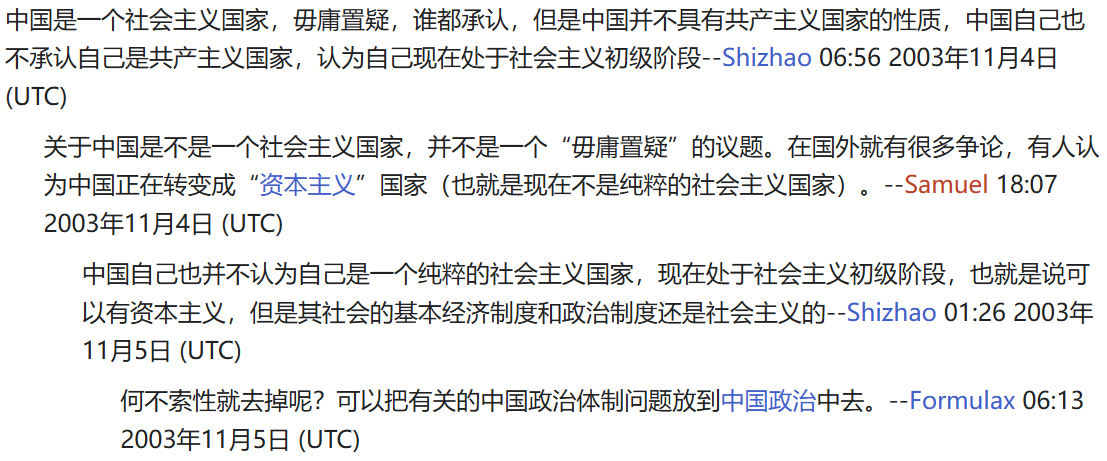

In [72]:
parsed_text0["sections"][1]

{'subsections': [],
 'comments': [{'text_blocks': ['==陳年討論==\n',
    'Urgh, the article is written from a pro-PRC point of view, serious NPOV-ing is needed. --[[用户:Lorenzarius|Lorenzarius]] 2003年2月22日 06:33 (UTC)\n',
    '\n',
    '請問上文中的pro-PRC 和 NPOV-ing 是什麼意思? 以及 urgh 是 呃 發語詞嗎?[[User:LCY|LCY]] 06:01 2003年11月4日 (UTC)\n',
    '\n',
    ':NPOV-Neutral Point of View（[[Wikipedia:中立观点|中立观点]]），是Wikipedia的重要守则之一。--[[User:Formulax|Formulax]] 06:06 2003年11月4日 (UTC)\n',
    '\n',
    '中国并不是一个共产主义国家。--[[User:Shizhao|Shizhao]] 06:46 2003年11月4日 (UTC)\n',
    '\n',
    "但是中國是一個社會主義國家嗎? 如果把'社會主義國家'這個描述去掉會不會比較好 或是改成'民主集中制國家'[[User:LCY|LCY]] 06:51 2003年11月4日 (UTC)\n",
    '\n',
    '中国是一个社会主义国家，毋庸置疑，谁都承认，但是中国并不具有共产主义国家的性质，中国自己也不承认自己是共产主义国家，认为自己现在处于社会主义初级阶段--[[User:Shizhao|Shizhao]] 06:56 2003年11月4日 (UTC)\n',
    '\n',
    ':关于中国是不是一个社会主义国家，并不是一个“毋庸置疑”的议题。在国外就有很多争论，有人认为中国正在转变成“[[资本主义]]”国家（也就是现在不是纯粹的社会主义国家）。--[[User:Samuel|Samuel]] 18:07 2003年11月4日 (UTC)\n',
    '\n',
    '::中国自己也并不认为自己是一个纯粹的社会主义国家，现在处

Compare to English: https://github.com/mediawiki-utilities/python-mwchatter/blob/master/talk_samples/user/687428034.txt

In [78]:
english_ex = None

with open("talk_samples/user/687428034.txt", "r") as f:
    text = f.read()
    english_ex = wc.parse(text)
    print(json.dumps(english_ex))

{"sections": [{"subsections": [], "comments": [{"text_blocks": ["This user is blocked...\n", "\n"], "comments": [], "cosigners": []}]}, {"subsections": [], "comments": [{"text_blocks": ["== Welcome! ==\n", "Hello, New User Person, and welcome to Wikipedia! Thank you for [[Special:Contributions/New User Person|your contributions]]. I hope you like the place and decide to stay. Here are a few links to pages you might find helpful:\n", "* [[Wikipedia:Introduction|Introduction]] and [[Help:Getting started|Getting started]]\n", "* [[Wikipedia:Contributing to Wikipedia|Contributing to Wikipedia]]\n", "* [[Wikipedia:Five pillars|The five pillars of Wikipedia]]\n", "* [[Help:Editing|How to edit a page]] and [[Wikipedia:Article development|How to develop articles]]\n", "* [[Wikipedia:Your first article|How to create your first article]]\n", "* [[Wikipedia:Simplified Manual of Style|Simplified Manual of Style]]\n", "\n", "You may also want to take the [[Wikipedia:The Wikipedia Adventure|Wikipedi

In [79]:
english_ex

{'sections': [{'subsections': [],
   'comments': [{'text_blocks': ['This user is blocked...\n', '\n'],
     'comments': [],
     'cosigners': []}]},
  {'subsections': [],
   'comments': [{'text_blocks': ['== Welcome! ==\n',
      'Hello, New User Person, and welcome to Wikipedia! Thank you for [[Special:Contributions/New User Person|your contributions]]. I hope you like the place and decide to stay. Here are a few links to pages you might find helpful:\n',
      '* [[Wikipedia:Introduction|Introduction]] and [[Help:Getting started|Getting started]]\n',
      '* [[Wikipedia:Contributing to Wikipedia|Contributing to Wikipedia]]\n',
      '* [[Wikipedia:Five pillars|The five pillars of Wikipedia]]\n',
      '* [[Help:Editing|How to edit a page]] and [[Wikipedia:Article development|How to develop articles]]\n',
      '* [[Wikipedia:Your first article|How to create your first article]]\n',
      '* [[Wikipedia:Simplified Manual of Style|Simplified Manual of Style]]\n',
      '\n',
      'Yo

# Try Parsing a Page with mwparserfromhell

In [7]:
pages = []

for page in dump:
    if page.namespace in {1,3}:
        print(page)
        
        revision = None
        for revision in page:
            pass
        
        pages.append(revision.text)
        
    if len(pages) == 5:
        break
    else:
        continue

Page(id=10, title='Brooke Vibber', namespace=3, redirect=None, restrictions=[])
Page(id=109, title='Formulax/Archive1', namespace=3, redirect=None, restrictions=[])
Page(id=123, title='Ghyll', namespace=3, redirect=None, restrictions=[])
Page(id=160, title='植物学', namespace=1, redirect=None, restrictions=[])
Page(id=163, title='生物学', namespace=1, redirect=None, restrictions=[])


In [8]:
pages

['<div style="width: 100%; margin: 0.2em 0; padding: 0.3em 0; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; font-size: 120%;">\'\'\'您好，Brion VIBBER！[[Wikipedia:欢迎，新来者|欢迎]]加入维基百科！\'\'\'</div>\n感謝您對維基百科的興趣與貢獻，希望您會喜歡這裡。除了\'\'\'[[Wikipedia:欢迎，新来者|歡迎辭]]\'\'\'外，也請您了解以下重要文章：\n{| style="background: transparent; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; border-collpase: collapse;" \n|- style="vertical-align: top;"\n| style="background: #f4f4f4; padding: .8em .2em;" | [[Image:Nuvola apps korganizer.png|35px|left|政策]]\n<div style="margin-left: 45px;">\'\'\'[[Wikipedia:五大支柱|五大支柱]]\'\'\'<br /><small>[[Wikipedia:不适合维基百科的文章|百科]]、[[Wikipedia:中性的观点|中立]]、[[Wikipedia:简明版权信息|开放]]、[[Wikipedia:文明|互重]]、[[Wikipedia:忽略所有规则|勇於改善]]</small></div>\n| style="background: #faf1df; padding: .8em .2em;" | [[Image:Nuvola apps emacs.png|45px|left|GNU]]\n<div style="margin-left: 55px;">\'\'\'[[Wikipedia:版权常见问题解答|版權問題解答]]\'\'\'<br /><small>貢獻內容必须是<u>您所著或獲得授權</u>、<br>同意在[[Wikipedia:版权信息|GFDL]]條

This is the page we're parsing below: https://zh.wikipedia.org/wiki/User_talk:Brooke_Vibber#%E7%BB%99%E6%82%A8%E4%B8%80%E4%B8%AA%E6%98%9F%E7%AB%A0%EF%BC%81_5

In [9]:
parse_0 = mwparserfromhell.parse(pages[0])

In [10]:
parse_0.filter_text()

['div',
 'style',
 'width: 100%; margin: 0.2em 0; padding: 0.3em 0; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; font-size: 120%;',
 '您好，Brion VIBBER！',
 'Wikipedia:欢迎，新来者',
 '欢迎',
 '加入维基百科！',
 'div',
 '\n感謝您對維基百科的興趣與貢獻，希望您會喜歡這裡。除了',
 'Wikipedia:欢迎，新来者',
 '歡迎辭',
 '外，也請您了解以下重要文章：\n',
 'style',
 'background: transparent; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; border-collpase: collapse;',
 'style',
 'vertical-align: top;',
 'style',
 'background: #f4f4f4; padding: .8em .2em;',
 ' ',
 'Image:Nuvola apps korganizer.png',
 '35px|left|政策',
 '\n',
 'div',
 'style',
 'margin-left: 45px;',
 'Wikipedia:五大支柱',
 '五大支柱',
 'br',
 'small',
 'Wikipedia:不适合维基百科的文章',
 '百科',
 '、',
 'Wikipedia:中性的观点',
 '中立',
 '、',
 'Wikipedia:简明版权信息',
 '开放',
 '、',
 'Wikipedia:文明',
 '互重',
 '、',
 'Wikipedia:忽略所有规则',
 '勇於改善',
 'small',
 'div',
 '\n',
 'style',
 'background: #faf1df; padding: .8em .2em;',
 ' ',
 'Image:Nuvola apps emacs.png',
 '45px|left|GNU',
 '\n',
 'div',
 'style',
 'margin

This is how we can get a list of the headings in the article:

In [11]:
parse_0.filter_headings()

['=== Subpages ===',
 '=== Total Search Malfunction ===',
 "== 'Defunct' my admin privilege ==",
 '== Welcome ==',
 '== 給您一些果仁蜜餅！ ==',
 '== 送给您一枚星章！ ==',
 '== 給您一個芝士漢堡！ ==',
 '==[[:Bug test page 1]]的快速删除通知==',
 '== 给您的泡沫红茶！ ==',
 '== 給您的星章！ ==',
 '== 给您的泡沫红茶！ ==',
 '== 给您一个星章！ ==',
 '== 给您一个星章！ ==',
 '== 馅饼送给您！ ==',
 '== 一只小猫送给您！ ==',
 '== 给您的乳酪汉堡！ ==',
 '== 给您一个星章！ ==',
 '== 给您一个星章！ ==',
 '== 给您一个星章！ ==',
 '== 紙杯蛋糕送給您！ ==',
 '==考古==',
 '== 一杯雪糕送給您！ ==',
 '== 給您的星章！ ==',
 '== 给您一个星章！ ==',
 '== Salute! ==']

This is how we can get a list of the sections in the article:

In [12]:
sections_0 = parse_0.get_sections()

This is a relatively clean section that illustrates ideal thread formatting: everyone signed their post, responses are indented, and the section has a header

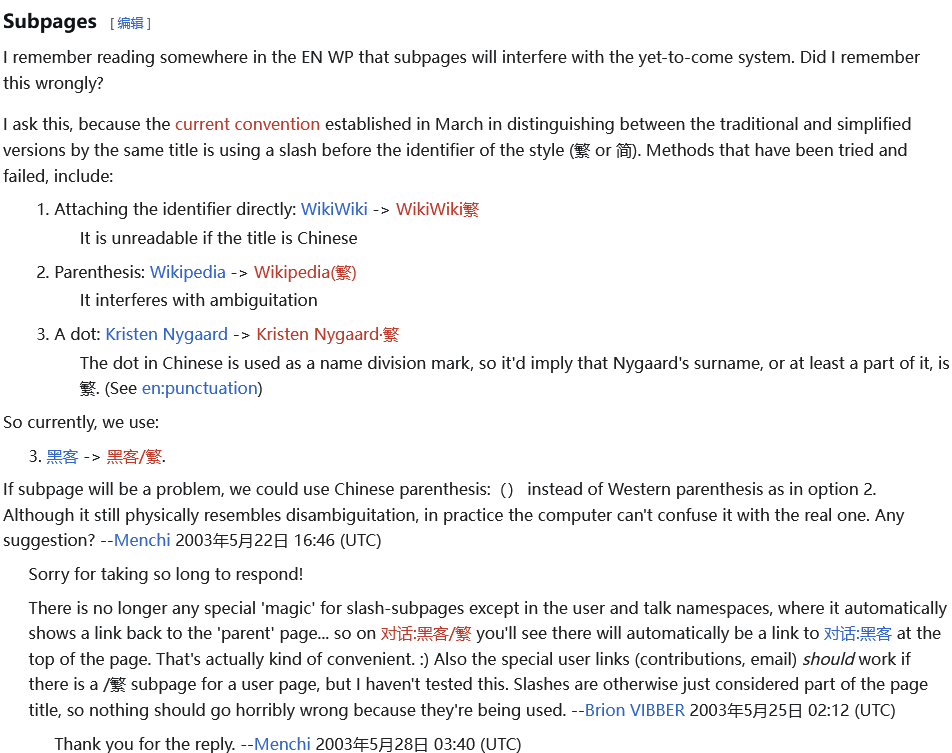

A naive approach would be to split posts based on the ":" symbol but this would capture e.g. lists that are part of a single post:

In [56]:
print(sections_0[1])

=== Subpages ===

I remember reading somewhere in the EN WP that subpages will interfere with the yet-to-come system. Did I remember this wrongly?

I ask this, because the [[Wikipedia 对话:繁简体问题/档案1 | current convention]] established in March in distinguishing between the traditional and simplified versions by the same title is using a slash before the identifier of the style (繁 or 简). Methods that have been tried and failed, include:
# Attaching the identifier directly: [[WikiWiki]] -> [[WikiWiki繁]]
#: It is unreadable if the title is Chinese
# Parenthesis: [[Wikipedia]] -> [[Wikipedia(繁)]]
#: It interferes with ambiguitation
#  
# A dot: [[Kristen Nygaard]] -> [[Kristen Nygaard·繁]]
#: The dot in Chinese is used as a name division mark, so it'd imply that Nygaard's surname, or at least a part of it, is 繁. (See [[en:punctuation]])

So currently, we use:
: 3. [[黑客]] -> [[黑客/繁]].

If subpage will be a problem, we could use Chinese parenthesis:（） instead of Western parenthesis as in option 

In [57]:
print(sections_0[2])

=== Total Search Malfunction ===

Several of the Wikipedians have expressed concerns about the malfunction of search. Every single word leads to a warning message. --[[用户:Menchi|Menchi]] 2003年5月28日 03:40 (UTC)

: Thanks for the quick fix. --[[用户:Menchi|Menchi]] 2003年5月30日 08:24 (UTC)

----

test




In [58]:
print(sections_0[10])

== 給您的星章！ ==

{| style="background-color: #fdffe7; border: 1px solid #fceb92;"
|rowspan="2" style="vertical-align: middle; padding: 5px;" | [[File:Special Barnstar Hires.png|100px]]
|style="font-size: x-large; padding: 3px 3px 0 3px; height: 1.5em;" | '''特別星章'''
|-
|style="vertical-align: middle; padding: 3px;" | 第一位中文維基人 [[User:Good afternoon|<span style="color: #006FFF;">'''本人'''</span>]]'''請'''各位''進行''[[User talk:Good afternoon|具建設性的認真討論]] 2014年6月8日 (日) 10:49 (UTC)
|}




To view the page in more readable format (simplified view compared to how it appears in browser, removes key formatting of indentation):

In [40]:
print(sections_0[1].strip_code())

 Subpages 

I remember reading somewhere in the EN WP that subpages will interfere with the yet-to-come system. Did I remember this wrongly?

I ask this, because the  current convention established in March in distinguishing between the traditional and simplified versions by the same title is using a slash before the identifier of the style (繁 or 简). Methods that have been tried and failed, include:
 Attaching the identifier directly: WikiWiki -> WikiWiki繁
 It is unreadable if the title is Chinese
 Parenthesis: Wikipedia -> Wikipedia(繁)
 It interferes with ambiguitation
  
 A dot: Kristen Nygaard -> Kristen Nygaard·繁
 The dot in Chinese is used as a name division mark, so it'd imply that Nygaard's surname, or at least a part of it, is 繁. (See en:punctuation)

So currently, we use:
 3. 黑客 -> 黑客/繁.

If subpage will be a problem, we could use Chinese parenthesis:（） instead of Western parenthesis as in option 2. Although it still physically resembles disambiguitation, in practice the compu

In [19]:
sections_0[2]

'=== Total Search Malfunction ===\n\nSeveral of the Wikipedians have expressed concerns about the malfunction of search. Every single word leads to a warning message. --[[用户:Menchi|Menchi]] 2003年5月28日 03:40 (UTC)\n\n: Thanks for the quick fix. --[[用户:Menchi|Menchi]] 2003年5月30日 08:24 (UTC)\n\n----\n\ntest\n\n'

In [17]:
sections_0[-1]

'== Salute! ==\n\n向您致意！--[[User:KiraRettosei|KiraRettosei]]（[[User talk:KiraRettosei|留言]]） 2023年2月21日 (二) 06:19 (UTC)'

This get_tree() method doesn't seem very useful:

In [24]:
print(parse_0.get_tree())

<
      div
      style
    = width: 100%; margin: 0.2em 0; padding: 0.3em 0; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; font-size: 120%;
>
      <
            b
      >
            \u60a8\u597d\uff0cBrion VIBBER\uff01
            [[
                  Wikipedia:\u6b22\u8fce\uff0c\u65b0\u6765\u8005
                | \u6b22\u8fce
            ]]
            \u52a0\u5165\u7ef4\u57fa\u767e\u79d1\uff01
      </
            b
      >
</
      div
>
\n\u611f\u8b1d\u60a8\u5c0d\u7dad\u57fa\u767e\u79d1\u7684\u8208\u8da3\u8207\u8ca2\u737b\uff0c\u5e0c\u671b\u60a8\u6703\u559c\u6b61\u9019\u88e1\u3002\u9664\u4e86
<
      b
>
      [[
            Wikipedia:\u6b22\u8fce\uff0c\u65b0\u6765\u8005
          | \u6b61\u8fce\u8fad
      ]]
</
      b
>
\u5916\uff0c\u4e5f\u8acb\u60a8\u4e86\u89e3\u4ee5\u4e0b\u91cd\u8981\u6587\u7ae0\uff1a\n
<
      table
      style
    = background: transparent; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; border-collpase: collapse;
>
      <
      

How do we parse sections into comment threads?

This function does not seem particularly useful, since most comments don't use the comment template: https://en.wikipedia.org/wiki/Template:Comment

In [30]:
parse_0.filter_comments()

['<!-- Template:Welcome -->']

Demonstrating how to use strip_code() to clean up markdown:

In [33]:
sections_0[-1]

'== Salute! ==\n\n向您致意！--[[User:KiraRettosei|KiraRettosei]]（[[User talk:KiraRettosei|留言]]） 2023年2月21日 (二) 06:19 (UTC)'

In [32]:
sections_0[-1].strip_code()

' Salute! \n\n向您致意！--KiraRettosei（留言） 2023年2月21日 (二) 06:19 (UTC)'

In [39]:
parse_0.filter_templates()

["{{#ifexist::Bug test page 1|'''请不要自行移除快速删除模板'''，快速删除旨在加快處理顯然不合適的頁面。若您认为删除理由不合適或您已对条目做了改善，请在'''[[:Bug test page 1|被提删页面]]'''快速删除模板的正下方'''加入<code>{{tl|hangon}}</code>'''，并在[[{{TALKPAGENAME:Bug test page 1}}|条目的讨论页]]中说明理由。您亦可以与提删的维基人进行沟通|如果您想取回已刪除页面的条目内容，您可联络[[WP:ADMIN|管理员]]}}",
 '{{tl|hangon}}',
 '{{TALKPAGENAME:Bug test page 1}}']

User signatures have different formats (e.g. "用户" versus "User") depending on language and even the Chinese ones are variable:

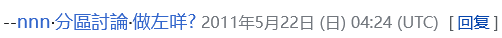



We should be able to define a regex using the formatting guidelines here?: https://en.wikipedia.org/wiki/Wikipedia:Signatures

In [44]:
sections_0[-2]

'== 给您一个星章！ ==\n\n{| style="background-color: #fdffe7; border: 1px solid #fceb92;"\n|rowspan="2" style="vertical-align: middle; padding: 5px;" | [[File:Original Barnstar Hires.png|100px]]\n|style="font-size: x-large; padding: 3px 3px 0 3px; height: 1.5em;" | \'\'\'原星章\'\'\'\n|-\n|style="vertical-align: middle; padding: 3px;" | 考古，拜访中维梦开始的地方 \'\'\'[[U:Zys6913|Zys6913]]\'\'\'<sup>\'\'\'[[UT:Zys6913|论]][[U:Zys6913/签名|签]][[Special:用户贡献/Zys6913|编]]\'\'\'</sup> 2023年1月9日 (一) 12:34 (UTC)\n|}\n\n'

Are nodes useful to us?

In [49]:
nodes = parse_0.nodes

In [50]:
nodes[0]

'<div style="width: 100%; margin: 0.2em 0; padding: 0.3em 0; border-top: 1px solid #ddd; border-bottom: 1px solid #ddd; font-size: 120%;">\'\'\'您好，Brion VIBBER！[[Wikipedia:欢迎，新来者|欢迎]]加入维基百科！\'\'\'</div>'

In [51]:
nodes[1]

'\n感謝您對維基百科的興趣與貢獻，希望您會喜歡這裡。除了'

In [52]:
nodes[2]

"'''[[Wikipedia:欢迎，新来者|歡迎辭]]'''"

In [60]:
pages[1]

'----\n你好，很高兴认识你。我想加入Wikipedia管理团队，加入了Wiki-L Mailing list,不知道是不是已经完成了？\n还想与你取得联系，可否取得你的email address?--[[用户：alan1986228]]\n----\nhi, 你对中国历史（例如说清朝）感不感兴趣？清回答。 --[[用户:Colipon]]\n::我对人文方面都十分有兴趣。--[[用户:Formulax|Formulax]] 2003年7月7日 02:14 (UTC)\n----\nhi, Formulax. 我最近一直没有过来。那张照片我确实没有确认版权问题。邓丽君是名人，我忽略了这一点, sorry. --[[用户:Dlloader]]\n----\n最近在升级系统,所以没怎么上网,现在好了.--[[用户:Formulax|Formulax]]\n----\n嗨，Formulax 。我最近要忙功课了，不能多来了。我已经开始向同学和朋友介绍这个网站了，\n但是他们多数不会特别热心来这里的。:(看了你写的关于 Linux 的条目，看来你还是真正的黑客了？:)我还会继续关心这里的进展 。--[[用户:ghyll]]\n----\n我有点不清楚，我加入的有关gimp的东西有版权问题吗？那是我自己译的。还有我的英文不太好，不是十分清楚那本英文书的版权，不过我请教过旁人的，他们说那本说的版权可以让我再发表，(只要提及原作者就行)我照做了，还有你说那些内容与百科全书无关，我就不知道什么才有关了。因为我到现在为止，还没读过百科全书，请指点一下。谢谢 wide288\n----\nFormulax你好！我在线上看到你的专长是Java，不知道你有没有翻译或写有关Java条目的计划？[[用户:Samuel|samuel]] 2003年5月15日 09:59 (UTC)\n:目前我主要翻译各国资料，或者一些历史、人文方面的条目，至于计算机方面的内容目前没有什么计划，我看你写得很好，如果有空的话，还是你先些吧！--[[用户:Formulax|Formulax]] 2003年5月16日 06:22 (UTC)\n\n----\n\n指数109? 哇！厲害,厲害！真棒！我知道最接近您的是指数99 -- [http://fr.wikipedia.org/wiki/Utilisateur:a

Observed user (talk page) link formats: very variable, but boil down to two types (one for English, one for Chinese):

[[用户:Brion VIBBER|Brion VIBBER]]

[[User:Djyang|Djyang]]

In [79]:
parse_0.filter_wikilinks()

['[[Wikipedia:欢迎，新来者|欢迎]]',
 '[[Wikipedia:欢迎，新来者|歡迎辭]]',
 '[[Image:Nuvola apps korganizer.png|35px|left|政策]]',
 '[[Wikipedia:五大支柱|五大支柱]]',
 '[[Wikipedia:不适合维基百科的文章|百科]]',
 '[[Wikipedia:中性的观点|中立]]',
 '[[Wikipedia:简明版权信息|开放]]',
 '[[Wikipedia:文明|互重]]',
 '[[Wikipedia:忽略所有规则|勇於改善]]',
 '[[Image:Nuvola apps emacs.png|45px|left|GNU]]',
 '[[Wikipedia:版权常见问题解答|版權問題解答]]',
 '[[Wikipedia:版权信息|GFDL]]',
 '[[Image:Postscript-viewer.svg|35px|left|手冊]]',
 '[[Wikipedia:使用指南|使用指南]]',
 '[[help:如何访问维基百科|安全访问]]',
 '[[Wikipedia:沙盒|測試編輯]]',
 '[[Wikipedia:如何编辑页面|如何编辑]]',
 '[[Help:目录|使用手册]]',
 '[[Help:中文维基百科的繁简处理|繁简处理]]',
 '[[Wikipedia:如何写出非常好的条目|寫個好條目]]',
 '[[Image:Icon apps query.svg|18px|left|問號]]',
 '[[Wikipedia:互助客栈|互助客栈]]',
 "[[Wikipedia:在讨论页上签名|'''簽名''']]",
 "[[Wikipedia talk:Guestbook for non-Chinese-speakers|''here'']]",
 '[[間隔號]]',
 '[[Help:如何輸入間隔號]]',
 '[[Wikipedia:维基百科人|维基百科人]]',
 '[[User:A10323nnn|nnn]]',
 '[[User talk:A10323nnn|分區討論]]',
 '[[Special:用戶貢獻/A10323nnn|做左咩?]]',
 '[[Special:Statistics]]',

The next user talk page is less structured (few headings): https://zh.wikipedia.org/wiki/User_talk:Formulax/Archive1

In [66]:
parse_1 = mwparserfromhell.parse(pages[1])

In [67]:
parse_1.filter_headings()

['==Bureaucrats提名==', '== 大學 ==', '== 你好，我提交的网站有什么问题吗？ ==']

In [68]:
sections_1 = parse_1.get_sections()

In [69]:
len(sections_1)

4

The first "section" has no heading. All the posts preceding the first heading are parsed as one section:

In [80]:
print(sections_1[0])

----
你好，很高兴认识你。我想加入Wikipedia管理团队，加入了Wiki-L Mailing list,不知道是不是已经完成了？
还想与你取得联系，可否取得你的email address?--[[用户：alan1986228]]
----
hi, 你对中国历史（例如说清朝）感不感兴趣？清回答。 --[[用户:Colipon]]
::我对人文方面都十分有兴趣。--[[用户:Formulax|Formulax]] 2003年7月7日 02:14 (UTC)
----
hi, Formulax. 我最近一直没有过来。那张照片我确实没有确认版权问题。邓丽君是名人，我忽略了这一点, sorry. --[[用户:Dlloader]]
----
最近在升级系统,所以没怎么上网,现在好了.--[[用户:Formulax|Formulax]]
----
嗨，Formulax 。我最近要忙功课了，不能多来了。我已经开始向同学和朋友介绍这个网站了，
但是他们多数不会特别热心来这里的。:(看了你写的关于 Linux 的条目，看来你还是真正的黑客了？:)我还会继续关心这里的进展 。--[[用户:ghyll]]
----
我有点不清楚，我加入的有关gimp的东西有版权问题吗？那是我自己译的。还有我的英文不太好，不是十分清楚那本英文书的版权，不过我请教过旁人的，他们说那本说的版权可以让我再发表，(只要提及原作者就行)我照做了，还有你说那些内容与百科全书无关，我就不知道什么才有关了。因为我到现在为止，还没读过百科全书，请指点一下。谢谢 wide288
----
Formulax你好！我在线上看到你的专长是Java，不知道你有没有翻译或写有关Java条目的计划？[[用户:Samuel|samuel]] 2003年5月15日 09:59 (UTC)
:目前我主要翻译各国资料，或者一些历史、人文方面的条目，至于计算机方面的内容目前没有什么计划，我看你写得很好，如果有空的话，还是你先些吧！--[[用户:Formulax|Formulax]] 2003年5月16日 06:22 (UTC)

----

指数109? 哇！厲害,厲害！真棒！我知道最接近您的是指数99 -- [http://fr.wikipedia.org/wiki/Utilisateur:anthere 法國的Anthere小姐]，我

The filter_wikilinks() function may help segment sections into posts/extract author IDs:

In [78]:
parse_1.filter_wikilinks()

['[[用户：alan1986228]]',
 '[[用户:Colipon]]',
 '[[用户:Formulax|Formulax]]',
 '[[用户:Dlloader]]',
 '[[用户:Formulax|Formulax]]',
 '[[用户:ghyll]]',
 '[[用户:Samuel|samuel]]',
 '[[用户:Formulax|Formulax]]',
 '[[用户:Menchi|Menchi]]',
 '[[用户:Formulax|Formulax]]',
 '[[中华人民共和国史]]',
 '[[用户:Menchi|Menchi]]',
 '[[用户:Formulax|Formulax]]',
 '[[加拿大]]',
 '[[用户:Menchi|Menchi]]',
 '[[用户:Shizhao|Shizhao]]',
 '[[用户:Formulax|Formulax]]',
 '[[中国君主列表]]',
 '[[用户:Colipon|方宏时]]',
 '[[用户:Formulax|Formulax]]',
 '[[文化大革命]]',
 '[[en:Cultural Revolution|英语版]]',
 '[[User:Colipon|方宏时-Colipon]]',
 '[[User:Formulax|Formulax]]',
 '[[User:Colipon|方宏时-Colipon]]',
 '[[User:Colipon|方宏时-Colipon]]',
 '[[User:Formulax|Formulax]]',
 '[[User:kou_zx|kou_zx]]',
 '[[User:kou_zx|kou_zx]]',
 '[[User:Colipon|方宏时-Colipon]]',
 '[[User:Formulax|Formulax]]',
 '[[MediaWiki:Copyright]]',
 '[[User:Shizhao|Shizhao]]',
 '[[User:Formulax|Formulax]]',
 '[[2004年台湾总统大选]]',
 '[[User:Shizhao|Shizhao]]',
 '[[User:Angela|Angela]]',
 '[[User:Wing|Wing]]',
 '[[User:

In [73]:
sections_1[0].filter_wikilinks()

['[[用户：alan1986228]]',
 '[[用户:Colipon]]',
 '[[用户:Formulax|Formulax]]',
 '[[用户:Dlloader]]',
 '[[用户:Formulax|Formulax]]',
 '[[用户:ghyll]]',
 '[[用户:Samuel|samuel]]',
 '[[用户:Formulax|Formulax]]',
 '[[用户:Menchi|Menchi]]',
 '[[用户:Formulax|Formulax]]',
 '[[中华人民共和国史]]',
 '[[用户:Menchi|Menchi]]',
 '[[用户:Formulax|Formulax]]',
 '[[加拿大]]',
 '[[用户:Menchi|Menchi]]',
 '[[用户:Shizhao|Shizhao]]',
 '[[用户:Formulax|Formulax]]',
 '[[中国君主列表]]',
 '[[用户:Colipon|方宏时]]',
 '[[用户:Formulax|Formulax]]',
 '[[文化大革命]]',
 '[[en:Cultural Revolution|英语版]]',
 '[[User:Colipon|方宏时-Colipon]]',
 '[[User:Formulax|Formulax]]',
 '[[User:Colipon|方宏时-Colipon]]',
 '[[User:Colipon|方宏时-Colipon]]',
 '[[User:Formulax|Formulax]]',
 '[[User:kou_zx|kou_zx]]',
 '[[User:kou_zx|kou_zx]]',
 '[[User:Colipon|方宏时-Colipon]]',
 '[[User:Formulax|Formulax]]',
 '[[MediaWiki:Copyright]]',
 '[[User:Shizhao|Shizhao]]',
 '[[User:Formulax|Formulax]]',
 '[[2004年台湾总统大选]]',
 '[[User:Shizhao|Shizhao]]',
 '[[User:Angela|Angela]]',
 '[[User:Wing|Wing]]',
 '[[User:

In [74]:
sections_1[0].filter_text()

['\n你好，很高兴认识你。我想加入Wikipedia管理团队，加入了Wiki-L Mailing list,不知道是不是已经完成了？\n还想与你取得联系，可否取得你的email address?--',
 '用户：alan1986228',
 '\n',
 '\nhi, 你对中国历史（例如说清朝）感不感兴趣？清回答。 --',
 '用户:Colipon',
 '\n',
 '我对人文方面都十分有兴趣。--',
 '用户:Formulax',
 'Formulax',
 ' 2003年7月7日 02:14 (UTC)\n',
 '\nhi, Formulax. 我最近一直没有过来。那张照片我确实没有确认版权问题。邓丽君是名人，我忽略了这一点, sorry. --',
 '用户:Dlloader',
 '\n',
 '\n最近在升级系统,所以没怎么上网,现在好了.--',
 '用户:Formulax',
 'Formulax',
 '\n',
 '\n嗨，Formulax 。我最近要忙功课了，不能多来了。我已经开始向同学和朋友介绍这个网站了，\n但是他们多数不会特别热心来这里的。:(看了你写的关于 Linux 的条目，看来你还是真正的黑客了？:)我还会继续关心这里的进展 。--',
 '用户:ghyll',
 '\n',
 '\n我有点不清楚，我加入的有关gimp的东西有版权问题吗？那是我自己译的。还有我的英文不太好，不是十分清楚那本英文书的版权，不过我请教过旁人的，他们说那本说的版权可以让我再发表，(只要提及原作者就行)我照做了，还有你说那些内容与百科全书无关，我就不知道什么才有关了。因为我到现在为止，还没读过百科全书，请指点一下。谢谢 wide288\n',
 '\nFormulax你好！我在线上看到你的专长是Java，不知道你有没有翻译或写有关Java条目的计划？',
 '用户:Samuel',
 'samuel',
 ' 2003年5月15日 09:59 (UTC)\n',
 '目前我主要翻译各国资料，或者一些历史、人文方面的条目，至于计算机方面的内容目前没有什么计划，我看你写得很好，如果有空的话，还是你先些吧！--',
 '用户:Formulax',
 'Formulax',
 ' 2003年5月16日 06:22 (UTC)\n\n',
 '\n\n指数1

In [71]:
sections_1[1]

'==Bureaucrats提名==\n\n您被提名为Bureaucrat，请参看[[Wikipedia:申请成为管理员]]--[[User:Shizhao|Shizhao]] ([[User talk:Shizhao|Talk]])[[WikiWiki| ]] 09:10 2004年2月26日 (UTC)\n\n'

In [72]:
sections_1[2]

"== 大學 ==\n\n您上傳到Wikisources的[http://sources.wikipedia.org/wiki/%E5%A4%A7%E5%AD%A6 大學]有亂碼，可以在上傳一下嗎？ --[[User:Samuel|Samuel]] ([[User talk:Samuel|对话页]])[[WikiWiki| ]] 11:17 2004年2月26日 (UTC)~\n\n:好像不是乱码。'''□'''在中文古籍中经常会看到，表示这个字由于年代久远或其他原因在最早的版本中已经没有了或无法辨认了，也就是表示缺字，其后往往会标上一个字，表示从其他书中获猜测出来的一个字。还有一些看似乱码的东西，是一种汉字在计算机中的写法。有些生僻的汉字在电脑上的字库中没有，只好用这种办法代替。比如“女+子”就是“好”字。--[[User:Shizhao|Shizhao]] ([[User talk:Shizhao|Talk]])[[WikiWiki| ]] 12:19 2004年2月26日 (UTC)\n\n----\n我已经将你设置为了bureaucrat--[[User:Shizhao|Shizhao]] ([[User talk:Shizhao|Talk]])[[WikiWiki| ]] 02:30 2004年3月6日 (UTC)\n\n:谢谢。--[[User:Formulax|Formulax]] 03:08 2004年3月6日 (UTC)\n\n"

# Revisiting Revisions

In [53]:
ex = next(iter(dump))

In [54]:
ex

Page(id=164, title='模板消息', namespace=4, redirect=None, restrictions=[])

In [55]:
for rev in ex:
    print(rev)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Revision(id=46122542, timestamp=Timestamp('2017-09-09T14:48:53Z'), user=User(id=2391631, text='AndyAndyAndyAlbert'), page=Page(id=164, title='模板消息', namespace=4, redirect=None, restrictions=[]), minor=False, comment='// Edit via Wikiplus', text='{{noteTA\n| T = zh-cn: 维基百科:模板消息; zh-tw: 維基百科:模板訊息\n| 1 = zh-cn: 模板消息; zh-tw: 模板訊息\n}}\n{{about||模板的說明以及如何使用模板名字空間|維基百科:模板名字空間|如何使用及創建、開發模板|使用說明:模板|非訊息模板的導航模板|維基百科:導航模板|條目信息框的格式及制定方法|維基百科:條目消息框}}\n{{shortcut|WP:TM|WP:TP|WP:Template|WP:模板|WP:樣版}}\n{{TOC right}}\n\n本頁是可在維基百科中使用的\'\'\'[[Help:模板|模板]]索引\'\'\'，依據主題分類整理。\n\n== 如何使用本頁面 == \n每欄最上方的\'\'\'粗體字連結\'\'\'可通往該類別模板的詳細解釋，以及如何使用它們的說明。\n\n如果您無法找到欲尋找的模板，請點選最接近的粗體字分類，由於模板眾多，因此部分特定用途的模板可能並未列在以下的目錄中，但可在分類頁面中找到。\n\n若您依然無法找到您所需要的模板，您可在[[維基百科:模板請求]]中提出您的需求。關於創建模板的說明，請參閱[[使用說明:模板]]。\n\n更完整的模板分類系統請至[[分類:維基百科模板]]中查詢。\n\n== 搜尋 ==\n除了使用下方的索引外，您也可以使用以下的文字欄位來-{zh-hans:搜索; zh-hant:搜尋; zh-cn:搜索; zh-tw:搜尋; zh-hk:搜尋; zh-sg:搜索}-模板名字空間。\n<div class="inputbox-hidecheckboxes">\n<inputbox>\ntype=fulltext\nwidth=40\nnames

# Developing regex for segmenting posts

In [13]:
headings = parse_0.filter_headings()

In [14]:
sections = parse_0.get_sections(include_lead=False)

In [15]:
len(headings)

25

In [16]:
len(sections)

25

In [17]:
sections

["=== Subpages ===\n\nI remember reading somewhere in the EN WP that subpages will interfere with the yet-to-come system. Did I remember this wrongly?\n\nI ask this, because the [[Wikipedia 对话:繁简体问题/档案1 | current convention]] established in March in distinguishing between the traditional and simplified versions by the same title is using a slash before the identifier of the style (繁 or 简). Methods that have been tried and failed, include:\n# Attaching the identifier directly: [[WikiWiki]] -> [[WikiWiki繁]]\n#: It is unreadable if the title is Chinese\n# Parenthesis: [[Wikipedia]] -> [[Wikipedia(繁)]]\n#: It interferes with ambiguitation\n#  \n# A dot: [[Kristen Nygaard]] -> [[Kristen Nygaard·繁]]\n#: The dot in Chinese is used as a name division mark, so it'd imply that Nygaard's surname, or at least a part of it, is 繁. (See [[en:punctuation]])\n\nSo currently, we use:\n: 3. [[黑客]] -> [[黑客/繁]].\n\nIf subpage will be a problem, we could use Chinese parenthesis:（） instead of Western parenth

Examples of signatures:

--[[用户:Menchi|Menchi]] 2003年5月28日 03:40 (UTC)

--[[用户:Menchi|Menchi]] 2003年5月22日 16:46 (UTC)

[[User:Wangxuan8331800|铁铁的火大了]]<small>（[[User talk:Wangxuan8331800|20.00000000000 words]]）
    
--[[User:GZWDer|GZWDer]]（[[User talk:GZWDer|留言]]） 2013年5月16日 (四) 14:48 (UTC)

In [18]:
sections[0].filter_headings()

['=== Subpages ===']

In [19]:
def segment_wikimarkup(wikimarkup):
    # courtesy of chatgpt
    # Regular expression to match user signatures and posts
    post_pattern = re.compile(r'([^\n]+)(--\[\[用户:(.*?)\]\])', re.MULTILINE)
    signature_pattern = re.compile(r'\[\[用户:(.*?)\]\]')
    
    # Extract all posts and corresponding users
    posts = []
    for match in post_pattern.finditer(wikimarkup):
        post_text = match.group(1).strip()  # Post content
        user_signature = match.group(3).strip()  # User signature
        posts.append({
            'post': post_text,
            'user': user_signature
        })
    
    # Return the list of posts and users
    return posts

In [20]:
sections_dict = {}

for section in sections:
    head = str(section.filter_headings()[0])
    sections_dict[head] = segment_wikimarkup(str(section))

In [21]:
for k in sections_dict:
    print(k)
    for post in sections_dict[k]:
        print(post)
        
    print()

=== Subpages ===
{'post': "If subpage will be a problem, we could use Chinese parenthesis:（） instead of Western parenthesis as in option 2. Although it still physically resembles disambiguitation, in practice the computer can't confuse it with the real one. Any suggestion?", 'user': 'Menchi|Menchi'}
{'post': ":There is no longer any special 'magic' for slash-subpages except in the user and talk namespaces, where it automatically shows a link back to the 'parent' page... so on [[对话:黑客/繁]] you'll see there will automatically be a link to [[对话:黑客]] at the top of the page. That's actually kind of convenient. :) Also the special user links (contributions, email) ''should'' work if there is a /繁 subpage for a user page, but I haven't tested this. Slashes are otherwise just considered part of the page title, so nothing should go horribly wrong because they're being used.", 'user': 'Brion VIBBER|Brion VIBBER'}
{'post': ':: Thank you for the reply.', 'user': 'Menchi|Menchi'}

=== Total Search M